# ECE 311 Lab Final:

## Due Date: Saturday, 8/8 @ 11:59PM
### Note: a 10% penalty will be applied for each hour your submission is late!

This lab final will review the import concepts from the course. Much of this lab should be familiar from previous labs. We encourage you to look back on your previous labs or look at the posted lab solutions on the course website to remind you how to produce your results and evaluate their correctness. Enough talking, let's get started!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy import signal
from pz_plot import pz_plot
from scipy.io import wavfile
from numpy.random import randn
from IPython.display import Audio

#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

%matplotlib inline

## Exercise 1: Building an Edge Detector 2.0

In Lab 2 Exercise 4, we built a simple edge detector by applying a high-pass filter along the rows and columns of an image, then combined the two results to create an image of detected edges. In this exercise, we will build a more sophisticated edge detector by adding onto our original design. This improved detector is known as the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

The Sobel operator uses the same intuition of finding horizontal and vertical edges separately, then combining these results to form the image. Let $G_x$ be our resulting image from detecting vertical edges (through the x-axis) and $G_y$ be our resulting image from detecting horizontal edges (through the y-axis, then our final result will be given by

$$
G[i,j] = \sqrt{G^2_x[i,j]+G^2_y[i,j]},
$$

where $G[i,j]$ is the pixel value at row $i$, column $j$. We compute $G_x$ and $G_y$ via convolution as follows:

$$
G_x = I * \begin{bmatrix}
1 & 0 & -1\\
\end{bmatrix} * \begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$
G_y = I * \begin{bmatrix}
1\\
0\\
-1\\
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix},
$$

where $I$ is our original image and $*$ denotes the convolution operator. Note that in the computation of $G_x$ we convolve along the rows with a high-pass filter and convolve along the columns with a low-pass filter, while the computation of $G_y$ reverses this relationship with the same filters.

a. Compute the image $G_x$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **row** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **column**. Also, be sure to use the "same" mode when using $\textrm{signal.convolve()}$.

b. Compute the image $G_y$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **column** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **row**.

c. Create final result image $G$ according to the above formulation. Plot your resulting image in grayscale.

Text(0.5, 1.0, 'Resulting Image after applying Sobel Operator Edge Detection')

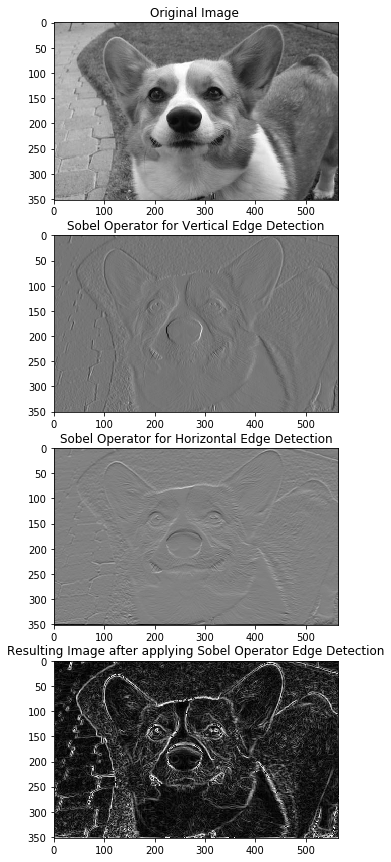

In [40]:
#load test-image.jpg
image = imread('test-image.jpg')
n_rows,n_cols = image.shape
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.imshow(image,'gray')
plt.title('Original Image ')
#Code for part a.
hpf_x=np.array([1,0,-1])
lpf_x=np.array([1,2,1])

Gx=np.zeros(image.shape)
for i in range(n_rows):
    Gx[i,:]=signal.convolve(image[i,:],hpf_x,'same')
for i in range(n_cols):
    Gx[:,i]=signal.convolve(Gx[:,i],lpf_x,'same')

plt.subplot(412)
plt.imshow(Gx,'gray')
plt.title('Sobel Operator for Vertical Edge Detection')
#Code for part b:
Gy=np.zeros(image.shape)
for i in range(n_cols):
    Gy[:,i]=signal.convolve(image[:,i],hpf_x,'same')
for i in range(n_rows):
    Gy[i,:]=signal.convolve(Gy[i,:],lpf_x,'same')
    
plt.subplot(413)
plt.imshow(Gy,'gray')
plt.title('Sobel Operator for Horizontal Edge Detection')
#Code for part c:
G_norm=image 
for i in range(n_rows):
    for j in range(n_cols):
        G_norm[i,j] = np.sqrt((Gx[i,j]**2)+(Gy[i,j]**2))
        
plt.subplot(414)
plt.imshow(G_norm,'gray')
plt.title('Resulting Image after applying Sobel Operator Edge Detection')

## Exercise 2: LCCDE, Transfer Function, and Impulse Response

For each of the following Linear Constant Coefficient Difference Equations (LCCDE), determine the transfer function (numerator and denominator coefficients) in order to plot both the pole-zero plot and impulse response of the system for the requested number of points. **Please plot your impulse responses as a stem plot!** For each system, indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.

Note: We have provided the $\textrm{pz_plot}()$ function from Lab 3 to create your pole-zero plots. Refer to Lab 3 for usage of this function. Some other functions of interest you may want to use from Lab 3 will be $\textrm{signal.dimpulse()}$ and $\textrm{signal.tf2zpk()}$.

a. $y_1[n] = \frac{1}{3}x[n]-\frac{1}{9}x[n-1]+x[n-2]-
\frac{1}{9}x[n-3]+\frac{1}{3}x[n-4],\quad 0\leq n < 8$

b. $y_2[n] = x[n] + \frac{1}{4}x[n-2] - y_2[n-1] + 6y_2[n-2],\quad 0\leq n < 20$

c. $y_3[n] = x[n] - \frac{1}{2}x[n-2] - y_3[n-2], \quad 0\leq n < 20$

Poles for y1: [0. 0. 0. 0.]
Zeros for y1: [0.12026537+1.60542522j 0.12026537-1.60542522j 0.04640129+0.61941193j
 0.04640129-0.61941193j] 

Poles for y2: [-3.  2.]
Zeros for y2: [-0.+0.5j  0.-0.5j] 

Poles for y3: [-0.+1.j  0.-1.j]
Zeros for y3: [ 0.70710678 -0.70710678] 



/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This

Text(0.5, 1.0, 'Impulse Response of System $y_3$')

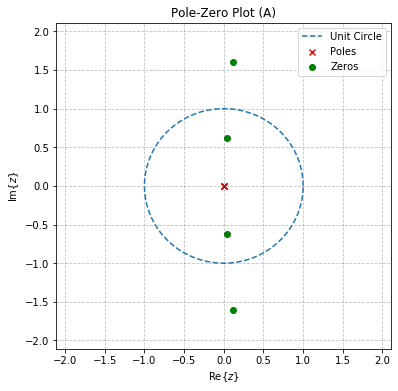

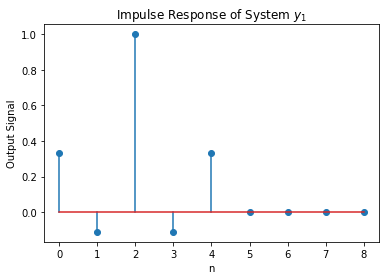

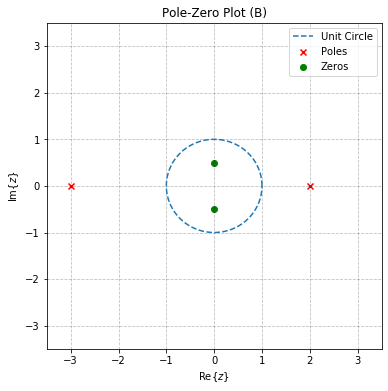

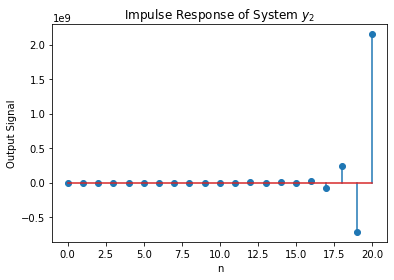

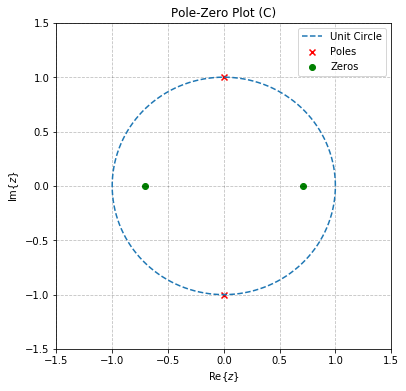

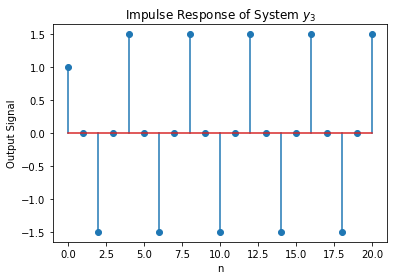

In [50]:
#Code for exercise 2:
#Code for part a:
b=[1/3,-1/9,1,-1/9,1/3] #numerator
a=[1,0,0,0,0] #denominator
z,p,_=signal.tf2zpk(b,a)

n,y=signal.dimpulse((b,a,1),n=9)
h_n=y[0]


print('Poles for y1:',p)
print('Zeros for y1:',z,'\n')
pz_plot(z,p,'Pole-Zero Plot (A)')

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System $y_1$')
#Code for part b:
b=[1,0,1/4] #numerator coefficients
a=[1,1,-6] #denominator coefficients
z,p,_=signal.tf2zpk(b,a)

n,y=signal.dimpulse((b,a,1),n=21)
h_n=y[0]


print('Poles for y2:',p)
print('Zeros for y2:',z,'\n')
pz_plot(z,p,'Pole-Zero Plot (B)')

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System $y_2$')
#Code for part c:
b=[1,0,-1/2] #numerator coefficients
a=[1,0,1] #denominator coefficients
z,p,_=signal.tf2zpk(b,a)

n,y=signal.dimpulse((b,a,1),n=21)
h_n=y[0]


print('Poles for y3:',p)
print('Zeros for y3:',z,'\n')
pz_plot(z,p,'Pole-Zero Plot (C)')

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System $y_3$')

Comments for 2.a:
This system is BIBO stable. This is due to the fact that the poles are included inside the unit circle and therefore the impulse response will approach 0 as time goes to infinity.

Comments for 2.b:
This system is BIBO unstable. This is due to the fact that the poles lie outside the unit circle and therefore the impulse response will approach an unbounded infinite result as time goes to infinity.

Comments for 2.c:
This system is marginally stable. This is due to the fact that the poles lie on the unit circle and therefore a signal will only become unbounded if the input excites one of the two poles (or both).


## Exercise 3: Windows and Spectral Resolution

**Note: please specify 512 points for each FFT you take in this problem!**

a. Plot the magnitude spectrum (not dB scale) of the following signal using $\textrm{np.fft.rfft()}$.

$$
x_1[n] = 0.5\sin\left(0.5\pi n\right) + 0.05\sin\left(0.57\pi n\right), \quad 0\leq n < 80
$$

What is happening to the second sinusoid with the smaller magnitude in the frequency domain? Is it easy to locate this frequency peak?

b. Fill in the function $\textrm{modify()}$ below which applies a Hamming window to an input signal. Apply this function to $x_1[n]$ and plot the resulting magnitude spectrum. Is it easier to locate the smaller frequency now?

c. Now let's try resolving two close, but equally large frequency peaks in the below signal $x_2[n]$.

$$
x_2[n] = 0.5\sin\left(0.5\pi n\right) + 0.5\sin\left(0.518\pi n\right), \quad 0\leq n < 80
$$

Plot the magnitude spectrum of $x_2[n]$ (not dB scale) before and after applying the $\textrm{modify()}$ function. Is it easier to differentiate between the two peaks after applying the Hamming window? Why or why not? **Hint: think about the tradeoff between rectangular and Hamming windows!**


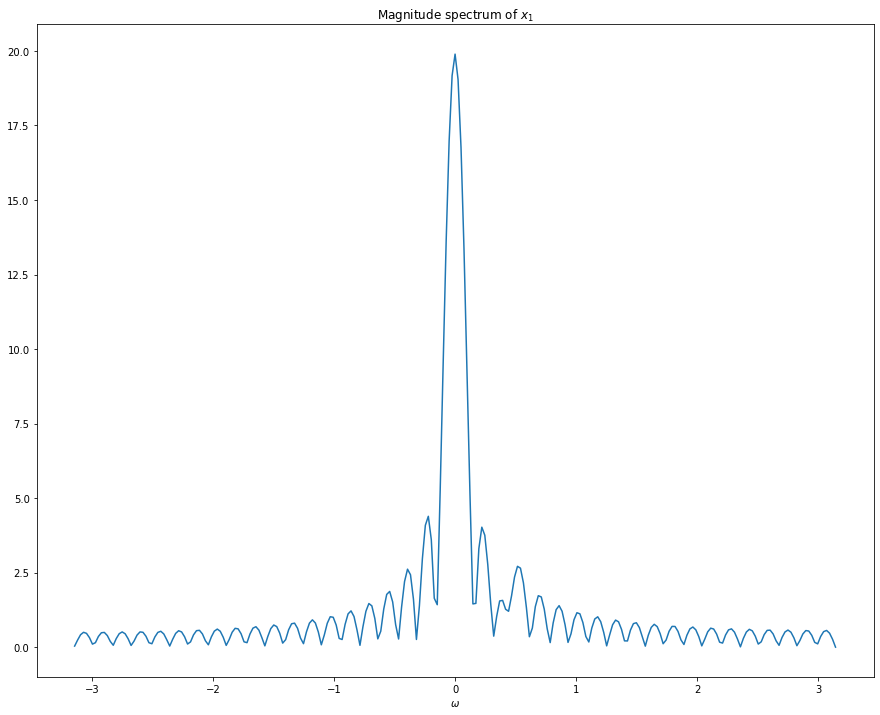

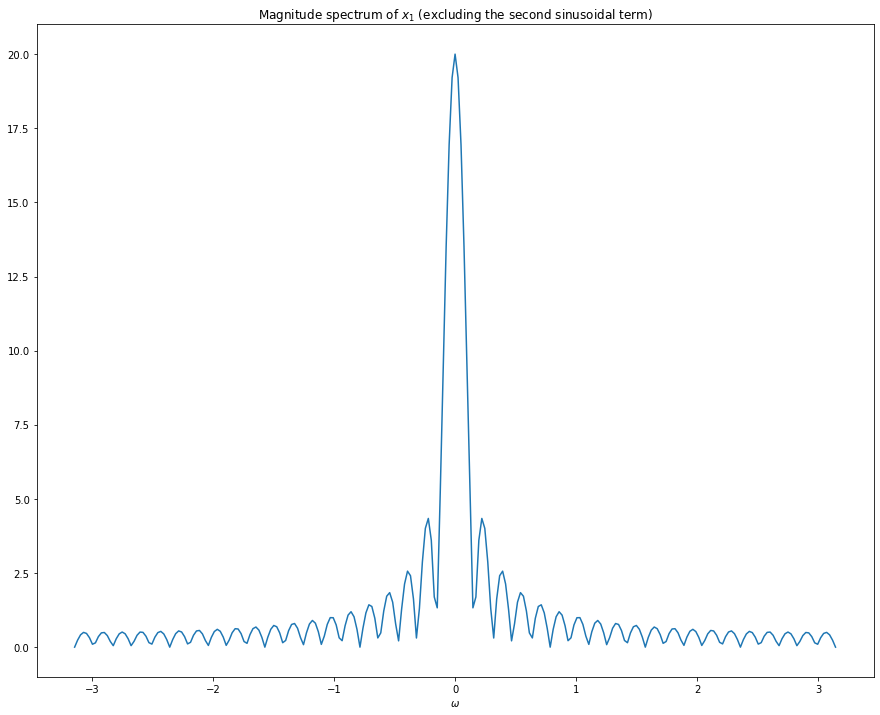

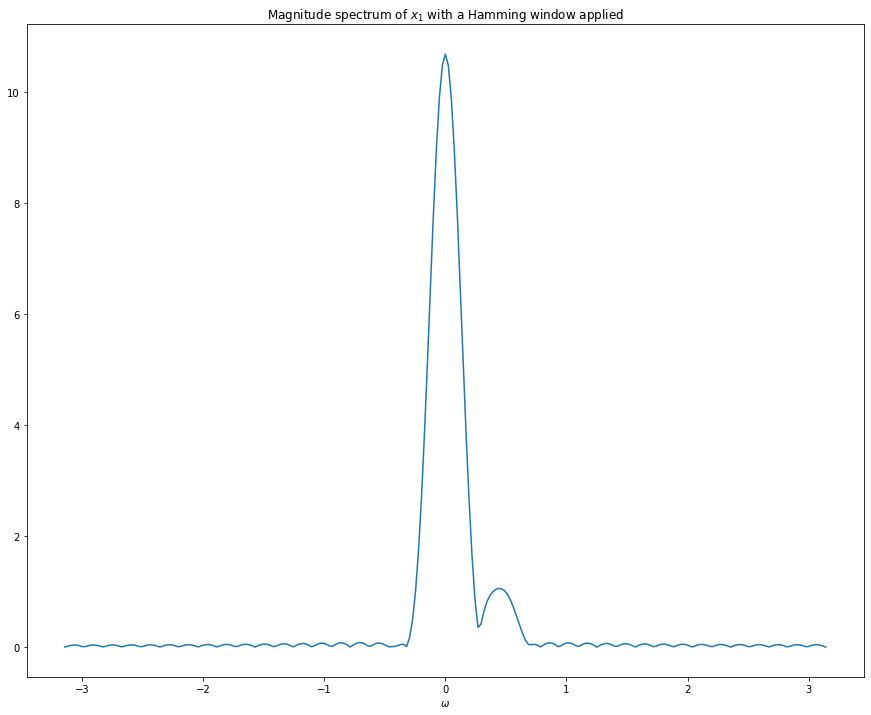

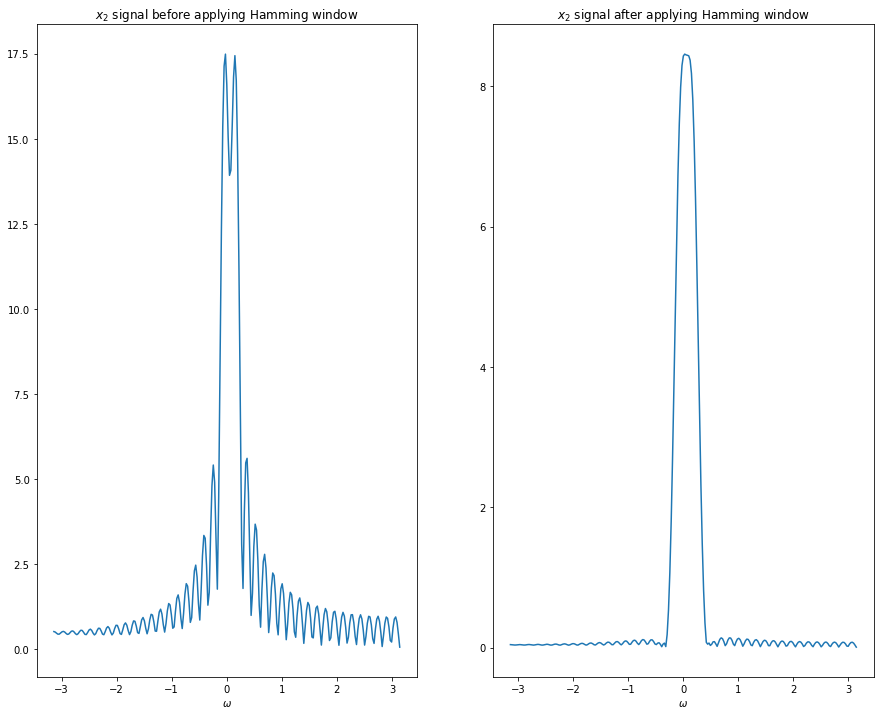

In [57]:
#Code for part 3.a:
x_1=np.array([0.5*np.sin(0.5*np.pi*n)+0.05*np.sin(0.57*np.pi*n) for n in range(80)])
x_1_fterm=np.array([0.5*np.sin(0.5*np.pi*n)for n in range(80)])

x1_fft=np.fft.rfft(x_1,512)
x1_fterm_fft=np.fft.rfft(x_1_fterm,512)

omega_1=np.linspace(-np.pi,np.pi,len(x1_fft))
omega_1_fterm=np.linspace(-np.pi,np.pi,len(x1_fterm_fft))

plt.figure(figsize=(15,12))
plt.title('Magnitude spectrum of $x_1$')
plt.xlabel('$\omega$')
plt.plot(omega_1,abs(x1_fft))

plt.figure(figsize=(15,12))
plt.title('Magnitude spectrum of $x_1$ (excluding the second sinusoidal term)')
plt.xlabel('$\omega$')
plt.plot(omega_1_fterm,abs(x1_fterm_fft))

#Code for part 3.b:
def modify(x):
    #apply a hamming window to the signal
    modified=x*np.hamming(len(x))
    return modified

x_ham=modify(x_1)
x1_fft_ham=np.fft.rfft(x_ham,512)
omega_1=np.linspace(-np.pi,np.pi,len(x1_fft_ham))

plt.figure(figsize=(15,12))
plt.title('Magnitude spectrum of $x_1$ with a Hamming window applied')
plt.xlabel('$\omega$')
plt.plot(omega_1,abs(x1_fft_ham))
#Code for part 3.c:
x_2=np.array([0.5*np.sin(0.5*np.pi*n)+0.5*np.sin(0.518*np.pi*n) for n in range(80)])

x2_ham=modify(x_2)

x2_fft=np.fft.rfft(x_2,512)
x2_fft_ham=np.fft.rfft(x2_ham,512)

omega_2=np.linspace(-np.pi,np.pi,len(x2_fft))
omega_2_ham=np.linspace(-np.pi,np.pi,len(x2_fft_ham))


plt.figure(figsize=(15,12))
plt.subplot(121)
plt.xlabel('$\omega$')
plt.title('$x_2$ signal before applying Hamming window')
plt.plot(omega_2,abs(x2_fft))

plt.subplot(122)
plt.xlabel('$\omega$')
plt.title('$x_2$ signal after applying Hamming window')
plt.plot(omega_2_ham,abs(x2_fft_ham))

Comments for part 3.a:
Comparing the difference betweent the superposition of sinusoids in the first graph to the single sinusodial term in the second graph indicates that there is interference taking place from the second lobe of the main signal with the first peak of our second signal. This would make locating the frequency peak difficult.

Comments for part 3.b:
Yes, after applying the Hamming window to the input signal the second term sinusoid becomes more apparent. 

Comments for part 3.c:
No, in this case it is not easier to distinguish between the two peaks after applying the Hamming window. In fact, you can actually see the two distinct peaks in the graph BEFORE we apply the Hamming window, making the Hamming window a rather bad choice. We can understand this behavior by looking at the DTFT of the Hamming function and noticing that the magnitude drops off very fast close and since the peaks are close together, they instead become combined into one indistinguishable peak after the window.


## Exercise 4: Chirp Redux

For this exercise, we will revisit the chirp activity from Lab 4 but this time with the help of spectrograms to visualize our chirps. The below provided code creates a five second long chirp signal with sampling rate $f_s = 44,100~Hz$ and maximum signal frequency $22,050~Hz$. Recall that the $\textrm{signal.chirp}$ function linearly sweeps between the requested frequencies over the set time interval. Hint: referring back to Labs 4 and 5 will help with understanding the chirp function and plotting spectrograms, respectively.

a. Plot the spectrogram of the original chirp signal we have generated for you.

b. Reduce the sampling rate of the original chirp signal by a factor of 5. Plot the resulting spectrogram and explain what you see. If we listened to this audio signal, how many rises and falls would you hear? **Note: you may either create a new chirp signal using the requested lower sampling or perform downsampling without an anti-aliasing filter.**

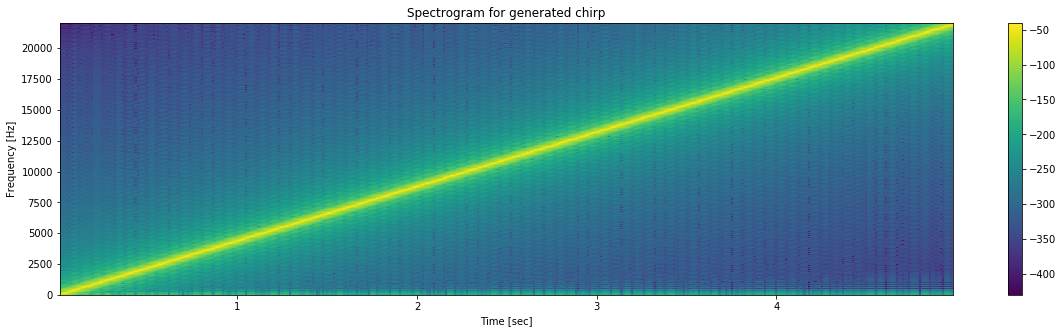

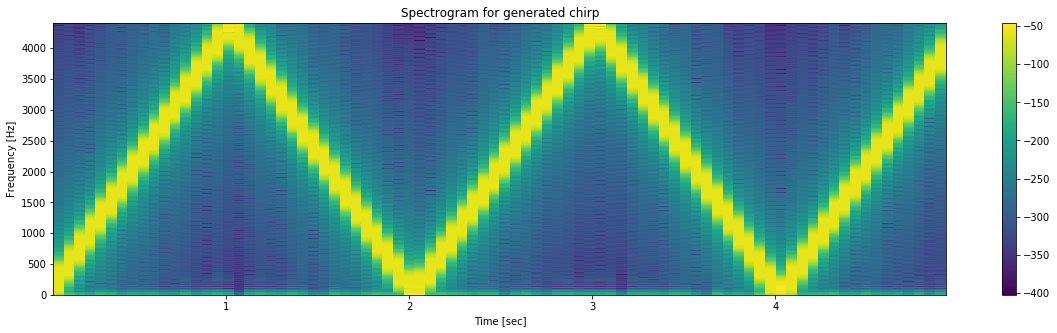

In [68]:
Fs = 44100 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t,f0 = f0, t1 = t1, f1 = f1)
nfft = 1024

#Code for part 4.a:
f_chirp, t_chirp, S_chirp = signal.spectrogram(chirp_original, Fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)
plt.figure(figsize=(20,5))
plt.pcolormesh(t_chirp, f_chirp, sig2db(S_chirp))
plt.title('Spectrogram for generated chirp')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

#Code for part 4.b:
Fs_reduced=Fs/5
t_r=np.linspace(0,t1,int(t1*Fs_reduced)) #Underscore 'r' means reduced. use int to get rid of floating point error
chirp_r=signal.chirp(t_r,f0=f0,t1=t1,f1=f1)
f_r_chirp, t_r_chirp, S_r_chirp = signal.spectrogram(chirp_r, Fs_reduced, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)
plt.figure(figsize=(20,5))
plt.pcolormesh(t_r_chirp, f_r_chirp, sig2db(S_r_chirp))
plt.title('Spectrogram for generated chirp')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()


Comments for 4.b:
If we listened to this signal, you would hear 3 rises in frequency and 2 falls in frequency, as can be if you take the derivative of the plot shown.


## Exercise 5: FIR Filter Design

a. Given the audio signal file ``Sound_original.wav``, compute and display the full FFT magnitude spectrum (no dB scale). Try listening to it!

b. Now let's assume that we pass this audio signal into a system described as followed.

<img src="./sys_illus.png" alt="Drawing" style="width: 600px;"/>

where $x[n]$ is our audio signal, $H(\omega)$ is an LTI system with impulse response $h[n]$, $d[n]$ is some noise, and $y[n]$ is the ouput. 
For this question, we want to simulate the ouput result $y[n]$.

We only know that the LTI system $H(\omega)$ is acting like a low-pass filter with a cutoff frequency of $\frac{\pi}{3}$. Use $\textrm{signal.remez()}$ to obtain the impulse response of this system assuming the filter length is $N = 100$ and the transition bandwidth is $\frac{\pi}{10}$. Plot magnitude response **on a dB scale** using the provided $\textrm{sig2db()}$ function. 

c. Now, we can obtain output $y[n]$ by filtering $x[n]$ with $h[n]$ and adding $d[n]$ after filtering. 

Here, $d[n]$ is assumed to be additive white Gaussian noise (AWGN). We can create our noise $d[n]$ by typing

``d = 1000 * np.random.randn(len(x_filtered))``

Compute $y[n]$ by summing your filtered audio signal $x[n]*h[n]$ and d. Try listening to y! Plot the FFT magnitude spectrum of $d[n]$ and the FFT magnitude spectrum of $y[n]$ on separate figures (no dB scale). Judging from these two graphs, do you think the simple filtering methods we have discussed in class will be able to perfectly separate our noise $d[n]$ from the filtered audio $x[n]*h[n]$?

/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


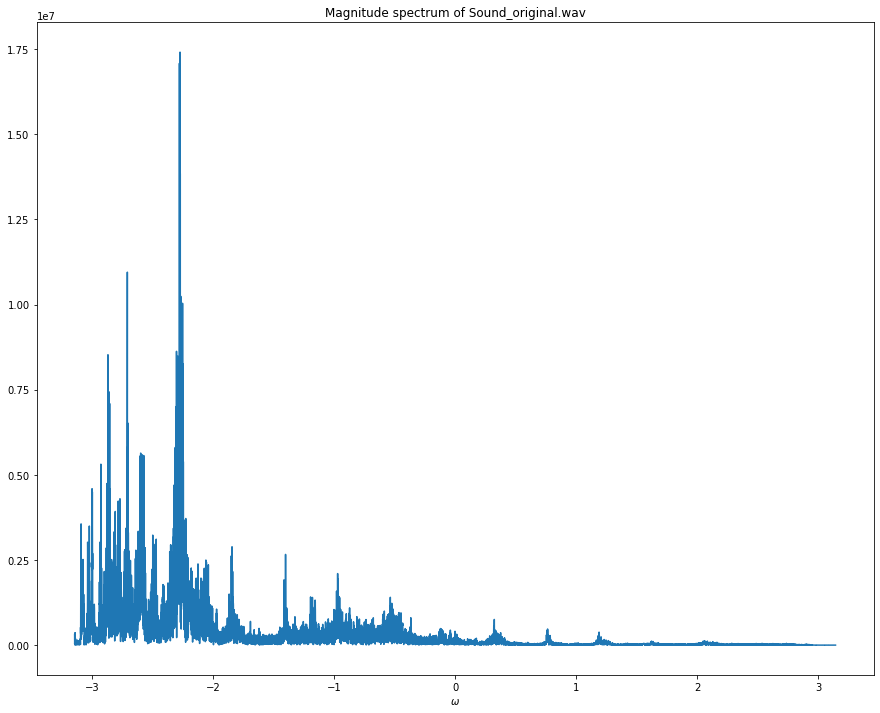

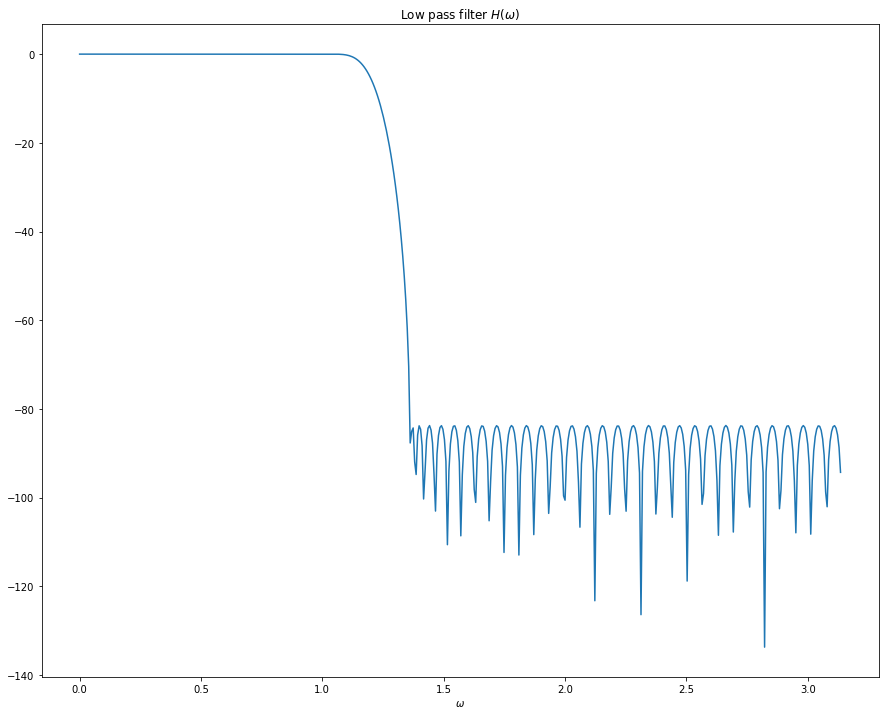

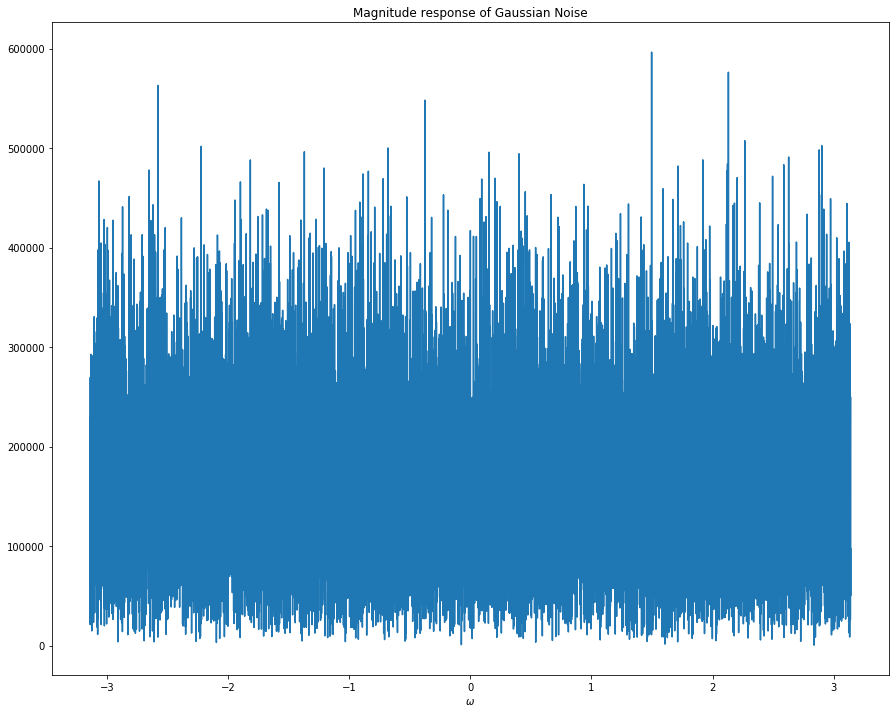

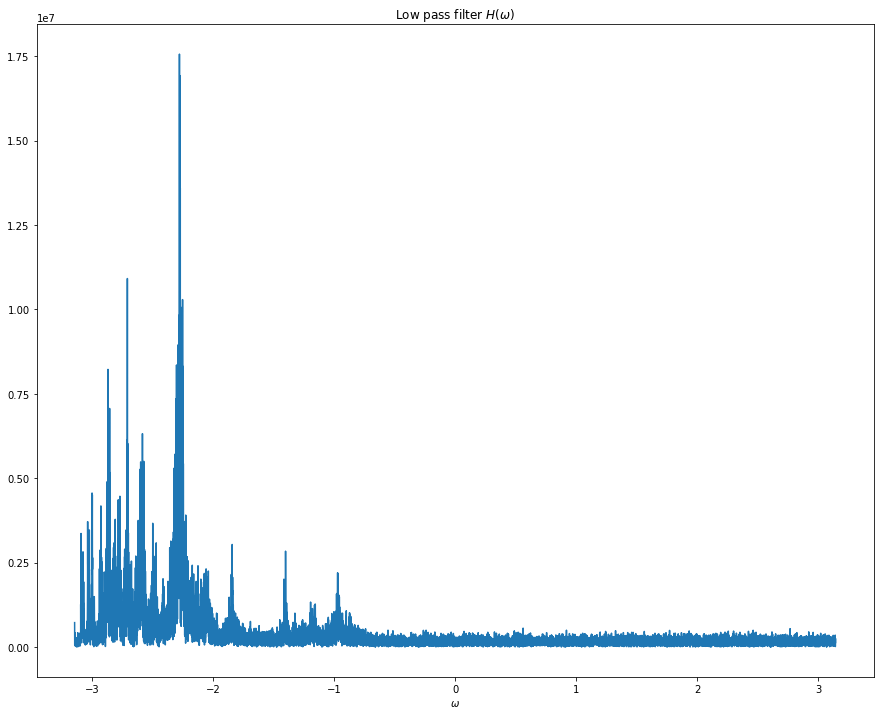

In [97]:
fs,original = wavfile.read('Sound_original.wav')
#Code for 5.a:
sound=np.fft.rfft(original)
omega=np.linspace(-np.pi,np.pi,len(sound))
plt.figure(figsize=(15,12))
plt.title('Magnitude spectrum of Sound_original.wav')
plt.xlabel('$\omega$')
plt.plot(omega,abs(sound))

Audio(data=original,rate=fs) #Listen to some nice gospel
#Code for 5.b:
N=100 #filter length
a=[1,0] #Y Coefficients in difference equation
lpf_bands=[0,1/3,1/3+(1/10),1]
lpf_des=[1,0]
lpf=signal.remez(N,lpf_bands,lpf_des,fs=2)
omega,H_lpf=signal.freqz(lpf,a)

plt.figure(figsize=(15,12))
plt.title('Low pass filter $H(\omega)$')
plt.xlabel('$\omega$')
plt.plot(omega,sig2db(abs(H_lpf)))
#Code for 5.c:
x_filtered=np.convolve(lpf,original)
d=1000*np.random.randn(len(x_filtered))
y_n=x_filtered+d #add noise to our output
Y_w=np.fft.rfft(y_n) #frequency response of y
gaussian_noise=np.fft.fftshift(np.fft.rfft(d))

plt.figure(figsize=(15,12))
plt.title('Magnitude response of Gaussian Noise')
plt.xlabel('$\omega$')
plt.plot(np.linspace(-np.pi,np.pi,len(gaussian_noise)),abs(gaussian_noise))

plt.figure(figsize=(15,12))
plt.title('Low pass filter $H(\omega)$')
plt.xlabel('$\omega$')
plt.plot(np.linspace(-np.pi,np.pi,len(Y_w)),abs(Y_w))
         
Audio(data = y_n,rate = fs) #Listen to some noisey gospel


Comments for 5.c:

No I do not think so. The reason being is that the noise we added is Gaussian noise that spreads the entire bandwidth of the signal and is not localized to a specific range of frequencies. Therefore it wo

# Submission Instructions:

Please place all files in one folder, compress that folder as a zip file, and name the zip file ``netid_labfinal``. Submit your zip file to Compass like previous labs.